In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA, TruncatedSVD

In [3]:
df = pd.read_csv("./ST1511-CA2-data/Company_Employee.csv")
df.head()

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No


hierarchical clustering

In [4]:
enc = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])

In [5]:
# normalisation
scaler = MinMaxScaler()

df_number_vars = pd.concat([df.drop(['Gender', 'Job Function', 'MaritalStatus', 'Resign Status', 'BusinessTravel'], axis=1), pd.DataFrame(enc.fit_transform(df['BusinessTravel'].values.reshape(-1, 1)), columns=['BusinessTravel'])], axis=1)
df_number_vars = scaler.fit_transform(df_number_vars)

df_encoded = pd.DataFrame()

df_encoded[['Age', 'Distance Between Company and Home (KM)', 'Education (1 is lowest, 5 is highest)', 'Job Satisfaction (1 is lowest, 4 is highest)', 'Salary ($)', 'Performance Rating (1 is lowest, 4 is highest)', 'Work Life Balance (1 is worst, 4 is best)', 'Length of Service (Years)', 'BusinessTravel']] = df_number_vars

# df[['Gender', 'BusinessTravel', 'Job Function', 'MaritalStatus', 'Resign Status']] =
df_encoded = pd.concat([df_encoded, pd.get_dummies(df[['Gender', 'Job Function', 'MaritalStatus']])], axis=1)

df_encoded.head()

,Age,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),BusinessTravel,Gender_Female,Gender_Male,Job Function_Human Resources,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.000000,0.25,1.000000,0.262454,0.0,0.000000,0.15,0.5,1,0,0,0,1,0,0,1
1,0.738095,0.250000,0.00,0.333333,0.217009,1.0,0.666667,0.25,1.0,0,1,0,1,0,0,1,0
2,0.452381,0.035714,0.25,0.666667,0.056925,0.0,0.666667,0.00,0.5,0,1,0,1,0,0,0,1
3,0.357143,0.071429,0.75,0.666667,0.100053,0.0,0.666667,0.20,1.0,1,0,0,1,0,0,1,0
4,0.214286,0.035714,0.00,0.333333,0.129489,0.0,0.666667,0.05,0.5,0,1,0,1,0,0,1,0


#### Analyse each department separately, as reasons for resignation may differ between job function.

In [6]:
df_sales = df_encoded.loc[df['Job Function'] == 'Sales']
df_research = df_encoded.loc[df['Job Function'] == 'Research & Development']
df_human = df_encoded.loc[df['Job Function'] == 'Human Resources']

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

clustering_sales = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(df_sales)
clustering_research = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(df_research)
clustering_human = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(df_human)

labels_sales = clustering_sales.labels_
labels_research = clustering_research.labels_
labels_human = clustering_human.labels_


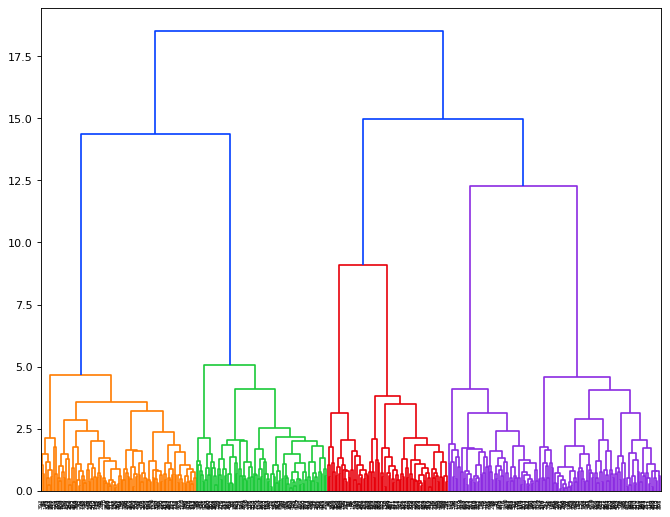

In [8]:
plt.figure(figsize=(10, 8), dpi=80)

sns.set_palette('bright')

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(clustering_sales)

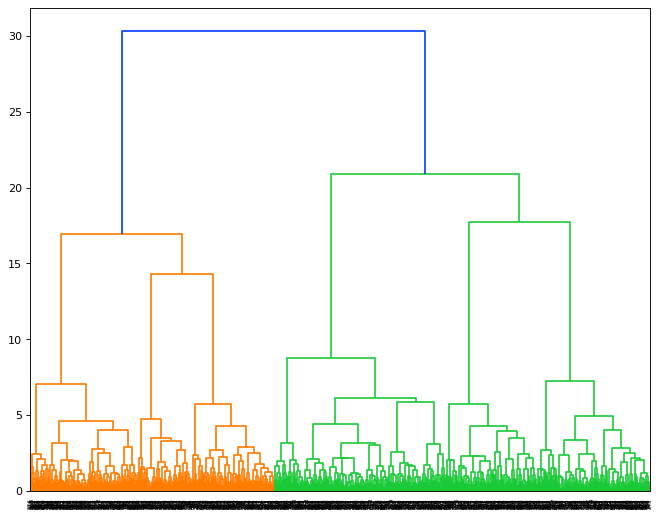

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
plot_dendrogram(clustering_research)

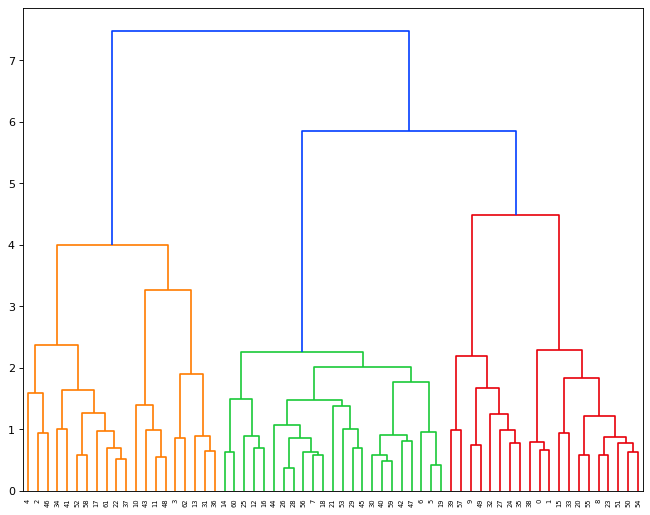

In [10]:
plt.figure(figsize=(10, 8), dpi=80)
plot_dendrogram(clustering_human)

In [11]:
n_clusters_sales = 6
n_clusters_research = 6
n_clusters_human = 4

clustering_sales_ = AgglomerativeClustering(n_clusters=n_clusters_sales, linkage='ward').fit_predict(df_sales)
clustering_research_ = AgglomerativeClustering(n_clusters=n_clusters_research, linkage='ward').fit_predict(df_research)
clustering_human_ = AgglomerativeClustering(n_clusters=n_clusters_human).fit_predict(df_human)

df_unencoded_sales = df.loc[df['Job Function'] == 'Sales']
df_unencoded_sales['cluster'] = clustering_sales_

df_unencoded_research = df.loc[df['Job Function'] == 'Research & Development']
df_unencoded_research['cluster'] = clustering_research_

df_unencoded_human = df.loc[df['Job Function'] == 'Human Resources']
df_unencoded_human['cluster'] = clustering_human_

/tmp/ipykernel_8235/3129610732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unencoded_sales['cluster'] = clustering_sales_
/tmp/ipykernel_8235/3129610732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unencoded_research['cluster'] = clustering_research_
/tmp/ipykernel_8235/3129610732.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [12]:
pca = PCA()
df_pca = pca.fit_transform(df_sales)

pca_research = PCA()
df_pca_research = pca_research.fit_transform(df_research)

pca_human = PCA()
df_pca_human = pca_human.fit_transform(df_human)

In [13]:
df_centred_score_sales = np.dot(df_sales - np.mean(df_sales, axis=0), pca.components_.T)
df_centred_score_sales = pd.DataFrame(df_centred_score_sales[:,:6], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

df_centred_score_research = np.dot(df_research - np.mean(df_research, axis=0), pca.components_.T)
df_centred_score_research = pd.DataFrame(df_centred_score_research[:,:6], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

df_centred_score_human = np.dot(df_human - np.mean(df_human, axis=0), pca.components_.T)
df_centred_score_human = pd.DataFrame(df_centred_score_human[:,:6], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [14]:
import matplotlib.pyplot as plt

# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(columns, pca, axis1, axis2, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[axis1,:].min(),0)-margin
    x_max = max(pca.components_[axis1,:].max(),0)+margin
    y_min = min(pca.components_[axis2,:].min(),0)-margin
    y_max = max(pca.components_[axis2,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[axis1], v[axis2], head_width=0.02, head_length=0.02, linewidth=2, color='red')
        ax.text(v[axis1], v[axis2]+text_pos, columns[i], color='black', ha='center', va='center', fontsize=8)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC"+str(axis1+1), fontsize=14)
    ax.set_ylabel("PC"+str(axis2+1), fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

In [15]:
color = sns.color_palette("bright")[:n_clusters_sales]

# Sales

In [16]:
clustering_sales_

array([4, 0, 2, 1, 4, 1, 1, 0, 0, 2, 2, 2, 5, 0, 1, 4, 4, 2, 1, 3, 2, 2,
       5, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 4, 0, 3, 0, 1, 3, 1, 1, 4, 1,
       0, 0, 4, 4, 5, 5, 4, 0, 1, 4, 4, 4, 4, 0, 3, 3, 0, 4, 5, 0, 2, 0,
       1, 3, 1, 0, 1, 1, 5, 1, 2, 5, 2, 0, 1, 2, 4, 1, 1, 0, 2, 3, 0, 2,
       1, 1, 5, 0, 5, 2, 1, 0, 0, 1, 4, 4, 1, 2, 4, 2, 1, 4, 2, 0, 2, 5,
       1, 1, 5, 0, 4, 0, 4, 1, 4, 5, 0, 0, 3, 0, 0, 2, 2, 0, 4, 2, 1, 2,
       1, 3, 2, 3, 3, 4, 2, 0, 3, 1, 1, 1, 1, 1, 3, 3, 1, 5, 3, 2, 3, 4,
       0, 0, 1, 4, 1, 5, 4, 2, 1, 2, 1, 2, 1, 5, 3, 2, 1, 3, 1, 4, 2, 4,
       2, 2, 2, 1, 0, 0, 4, 0, 2, 0, 0, 3, 1, 3, 0, 3, 3, 1, 1, 1, 1, 5,
       1, 0, 0, 2, 2, 4, 4, 4, 1, 0, 1, 3, 2, 2, 1, 1, 0, 0, 3, 3, 4, 3,
       2, 4, 3, 2, 4, 1, 2, 2, 0, 0, 0, 4, 0, 3, 1, 0, 0, 1, 1, 0, 3, 4,
       2, 5, 2, 0, 0, 3, 1, 2, 1, 3, 1, 4, 0, 0, 2, 2, 1, 4, 5, 0, 3, 1,
       1, 0, 2, 3, 5, 2, 0, 4, 1, 3, 2, 4, 0, 4, 3, 4, 1, 2, 2, 5, 2, 4,
       5, 5, 4, 0, 0, 2, 2, 4, 0, 1, 1, 1, 1, 1, 1,

In [17]:
for i in range(n_clusters_sales):
    data = df.loc[df['Job Function']=='Sales'].loc[(clustering_sales_==i)]['Resign Status']
    sales_cluster = data.value_counts()
    count = len(data)
    try:
        print(f'Percentage of resigned people in cluster {i} ({count} samples): {sales_cluster.Yes} / {count} = {sales_cluster.Yes / count:0.2f}')
    except AttributeError:
        print(f'Percentage of resigned people in cluster {i} ({count} samples): 0')


Percentage of resigned people in cluster 0 (94 samples): 10 / 94 = 0.11
Percentage of resigned people in cluster 1 (112 samples): 19 / 112 = 0.17
Percentage of resigned people in cluster 2 (88 samples): 27 / 88 = 0.31
Percentage of resigned people in cluster 3 (57 samples): 8 / 57 = 0.14
Percentage of resigned people in cluster 4 (65 samples): 26 / 65 = 0.40
Percentage of resigned people in cluster 5 (30 samples): 2 / 30 = 0.07


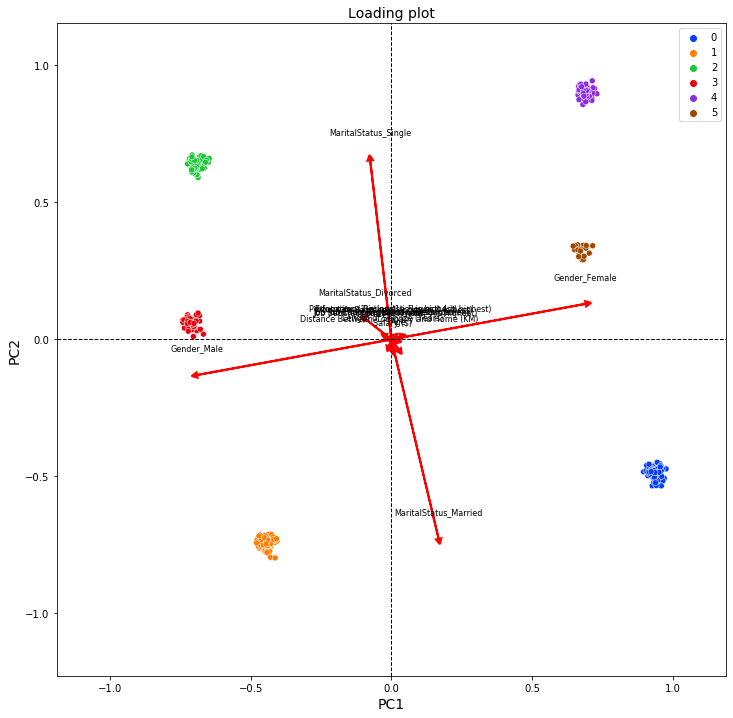

In [18]:
loadingplot(df_encoded.columns, pca, 0, 1, width=12, height=12)
sns.scatterplot(x=df_centred_score_sales['PC1'], y=df_centred_score_sales['PC2'], hue=clustering_sales_, palette=color)
plt.show()

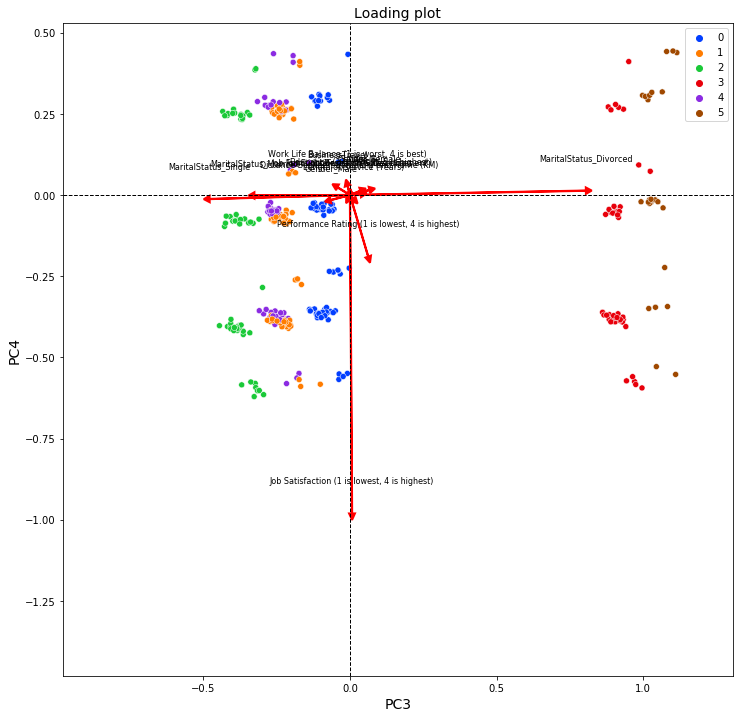

In [19]:
loadingplot(df_encoded.columns, pca, 2, 3, width=12, height=12)
sns.scatterplot(x=df_centred_score_sales['PC3'], y=df_centred_score_sales['PC4'], hue=clustering_sales_, palette=color)
plt.show()

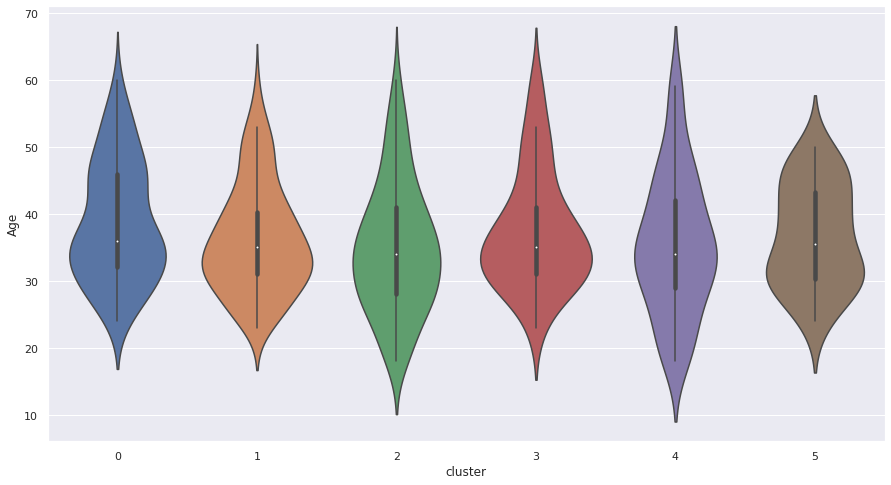

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
sns.violinplot(y=df_unencoded_sales['Age'], x=df_unencoded_sales['cluster'])

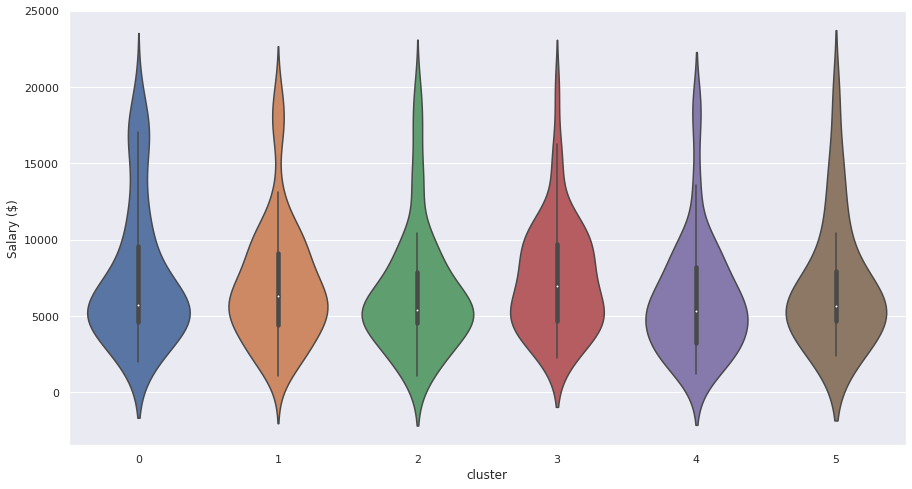

In [21]:
sns.violinplot(y=df_unencoded_sales['Salary ($)'], x=df_unencoded_sales['cluster'])
plt.show()

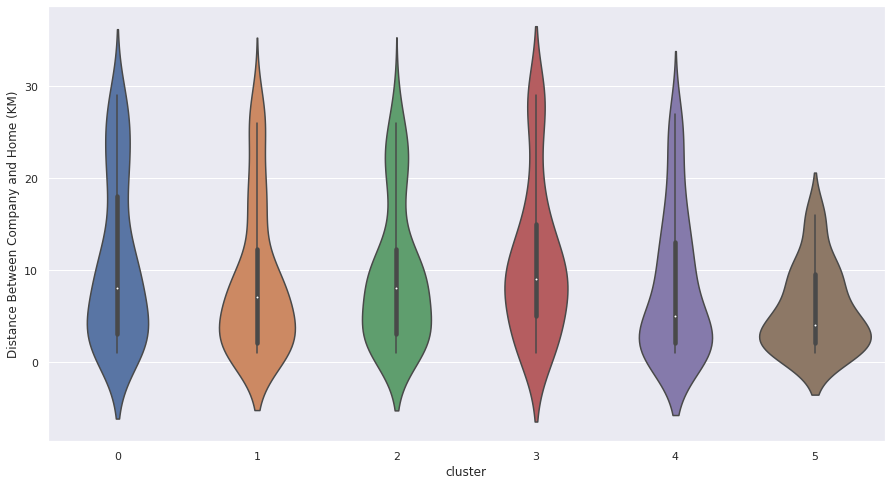

In [22]:
sns.violinplot(y=df_unencoded_sales['Distance Between Company and Home (KM)'], x=df_unencoded_sales['cluster'])
plt.show()

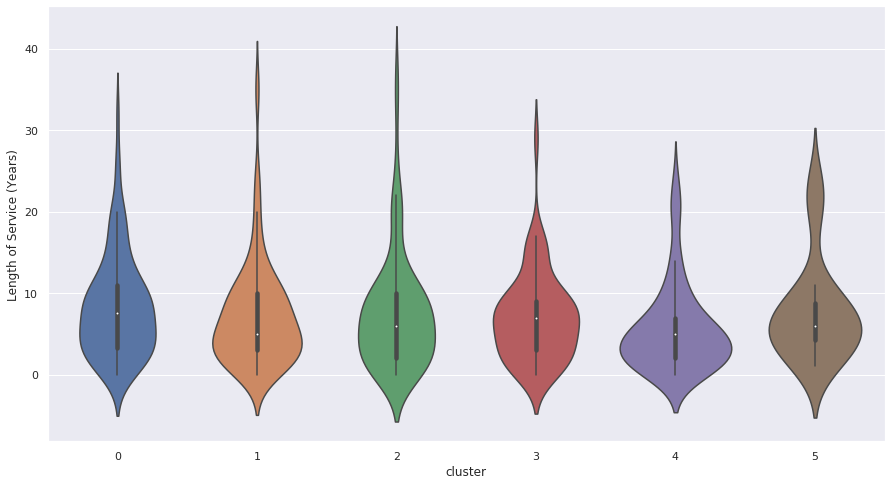

In [23]:
sns.violinplot(y=df_unencoded_sales['Length of Service (Years)'], x=df_unencoded_sales['cluster'])
plt.show()

fig, ax = plt.subplots(1, n_clusters_sales)

fig.set_figwidth(30)

for i in range(n_clusters_sales):
    data = df.loc[df['Job Function']=='Sales'].loc[clustering_sales_==i]['Education (1 is lowest, 5 is highest)']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('Education levels of cluster ' + str(i))

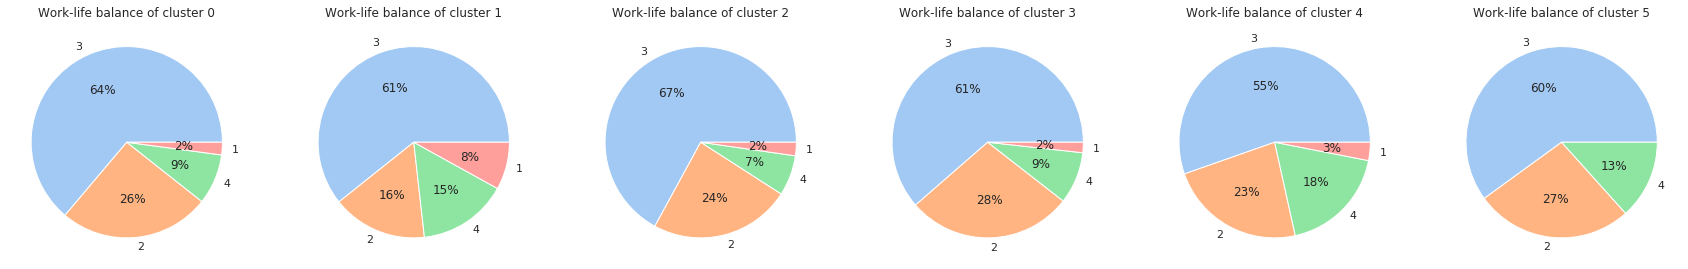

In [24]:
fig, ax = plt.subplots(1, n_clusters_sales)

fig.set_figwidth(30)

for i in range(n_clusters_sales):
    data = df.loc[df['Job Function']=='Sales'].loc[clustering_sales_==i]['Work Life Balance (1 is worst, 4 is best)']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('Work-life balance of cluster ' + str(i))

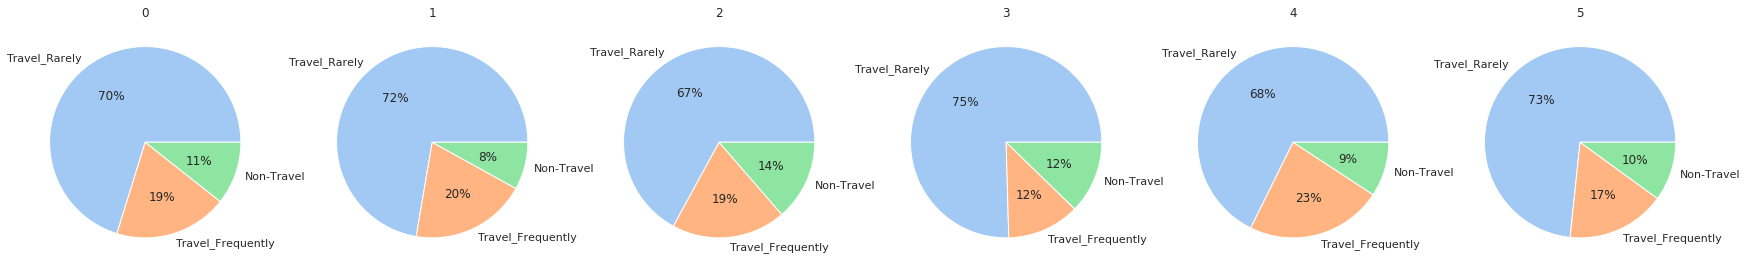

In [25]:
fig, ax = plt.subplots(1, n_clusters_sales)

fig.set_figwidth(30)

for i in range(n_clusters_sales):
    data = df.loc[df['Job Function']=='Sales'].loc[clustering_sales_==i]['BusinessTravel']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('' + str(i))

# Research and Development 

In [26]:
for i in range(n_clusters_research):
    data = df.loc[df['Job Function']=='Research & Development'].loc[(clustering_research_==i)]['Resign Status']
    research_cluster = data.value_counts()
    count = len(data)
    try:
        print(f'Percentage of resigned people in cluster {i} ({count} samples): {research_cluster.Yes} / {count} = {research_cluster.Yes / count:0.2f}')
    except AttributeError:
        print(f'Percentage of resigned people in cluster {i} ({count} samples): 0')

Percentage of resigned people in cluster 0 (266 samples): 31 / 266 = 0.12
Percentage of resigned people in cluster 1 (175 samples): 45 / 175 = 0.26
Percentage of resigned people in cluster 2 (129 samples): 21 / 129 = 0.16
Percentage of resigned people in cluster 3 (141 samples): 14 / 141 = 0.10
Percentage of resigned people in cluster 4 (167 samples): 18 / 167 = 0.11
Percentage of resigned people in cluster 5 (83 samples): 4 / 83 = 0.05


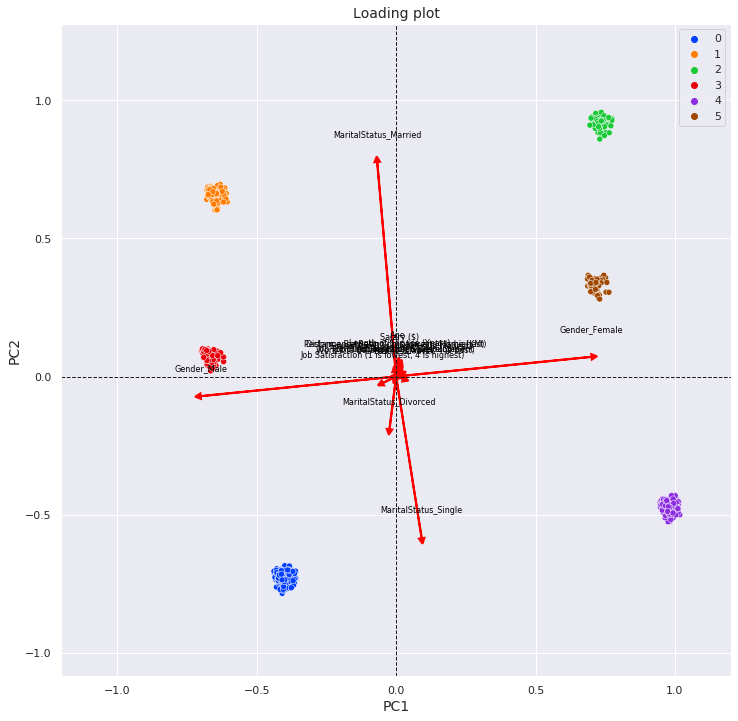

In [27]:
loadingplot(df_encoded.columns, pca_research, 0, 1, width=12, height=12)
sns.scatterplot(x=df_centred_score_research['PC1'], y=df_centred_score_research['PC2'], hue=clustering_research_, palette=color)
plt.show()

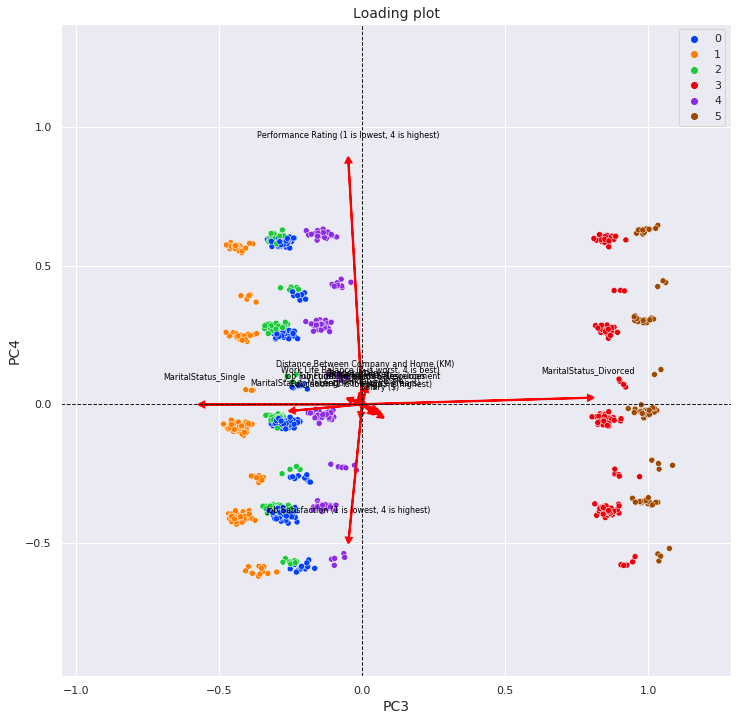

In [28]:
loadingplot(df_encoded.columns, pca_research, 2, 3, width=12, height=12)
sns.scatterplot(x=df_centred_score_research['PC3'], y=df_centred_score_research['PC4'], hue=clustering_research_, palette=color)
plt.show()

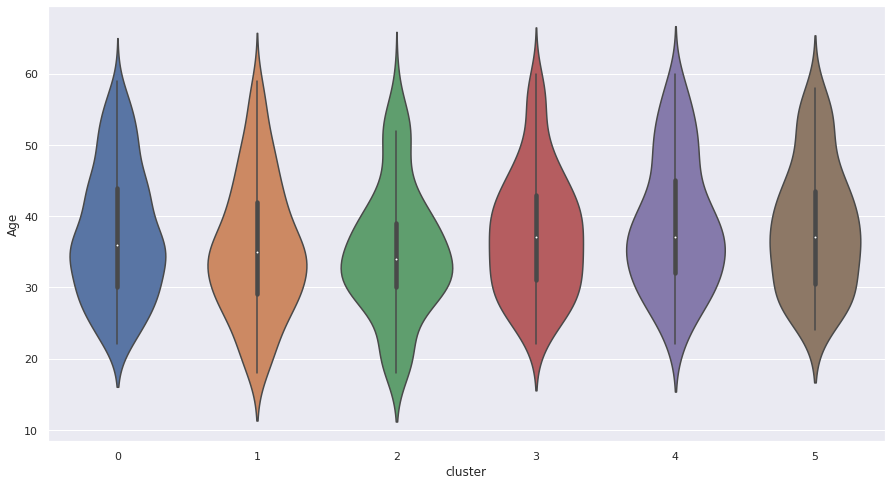

In [29]:
sns.violinplot(y=df_unencoded_research['Age'], x=df_unencoded_research['cluster'])
plt.show()

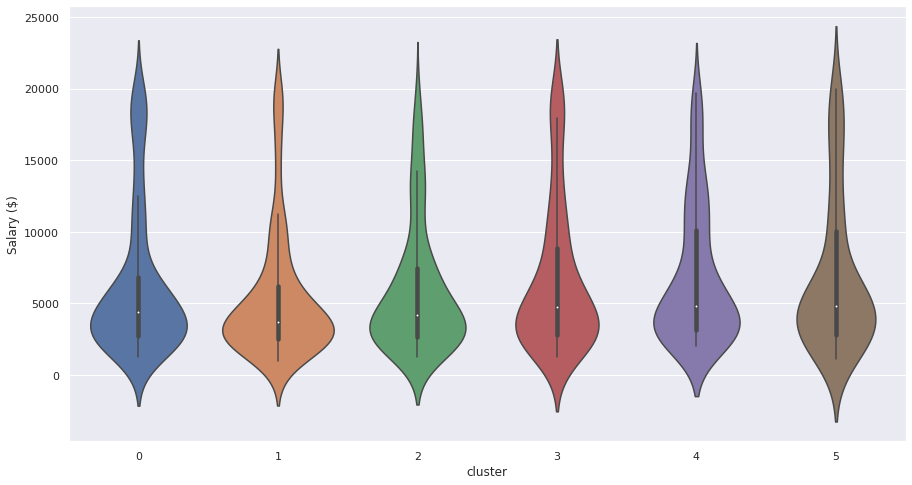

In [30]:
sns.violinplot(y=df_unencoded_research['Salary ($)'], x=df_unencoded_research['cluster'])
plt.show()

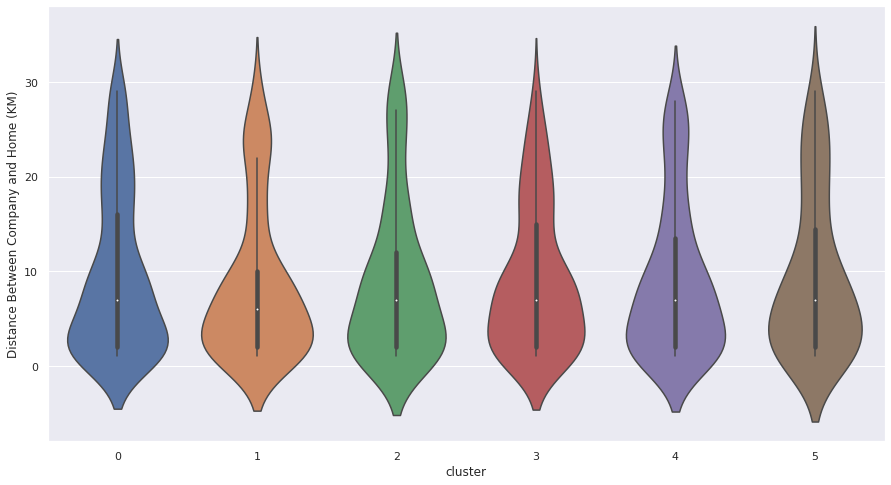

In [31]:
sns.violinplot(y=df_unencoded_research['Distance Between Company and Home (KM)'], x=df_unencoded_research['cluster'])
plt.show()

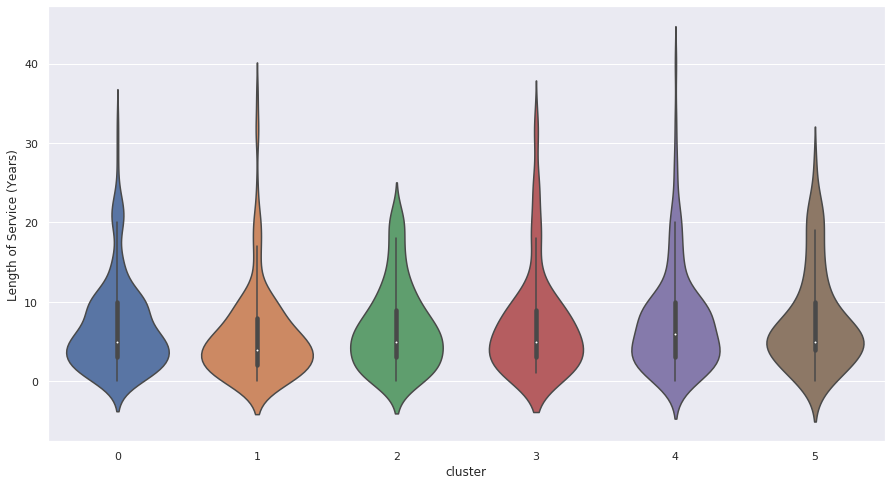

In [32]:
sns.violinplot(y=df_unencoded_research['Length of Service (Years)'], x=df_unencoded_research['cluster'])
plt.show()

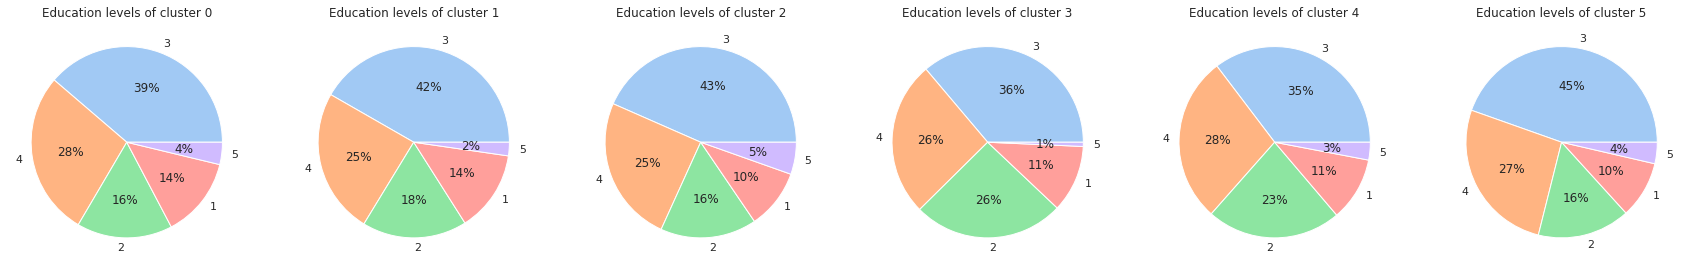

In [33]:
fig, ax = plt.subplots(1, n_clusters_research)

fig.set_figwidth(30)

for i in range(n_clusters_research):
    data = df.loc[df['Job Function']=='Research & Development'].loc[clustering_research_==i]['Education (1 is lowest, 5 is highest)']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('Education levels of cluster ' + str(i))

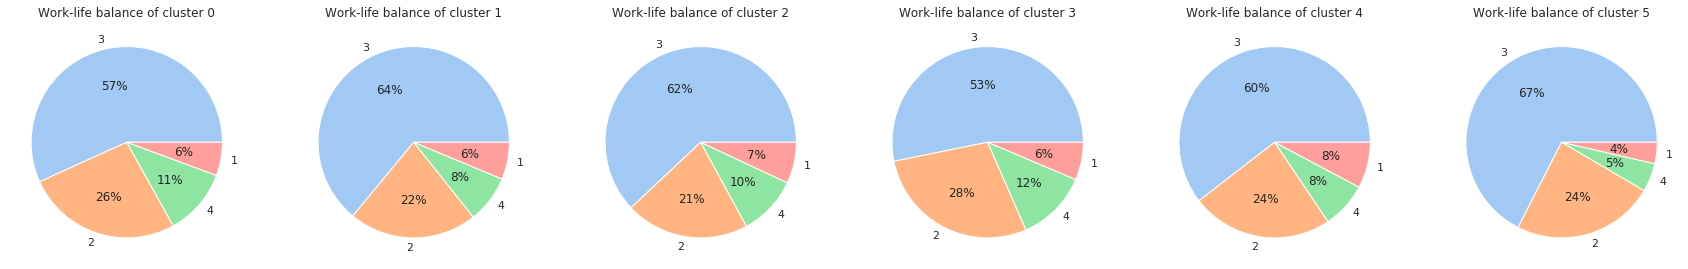

In [34]:
fig, ax = plt.subplots(1, n_clusters_research)

fig.set_figwidth(30)

for i in range(n_clusters_research):
    data = df.loc[df['Job Function']=='Research & Development'].loc[clustering_research_==i]['Work Life Balance (1 is worst, 4 is best)']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('Work-life balance of cluster ' + str(i))

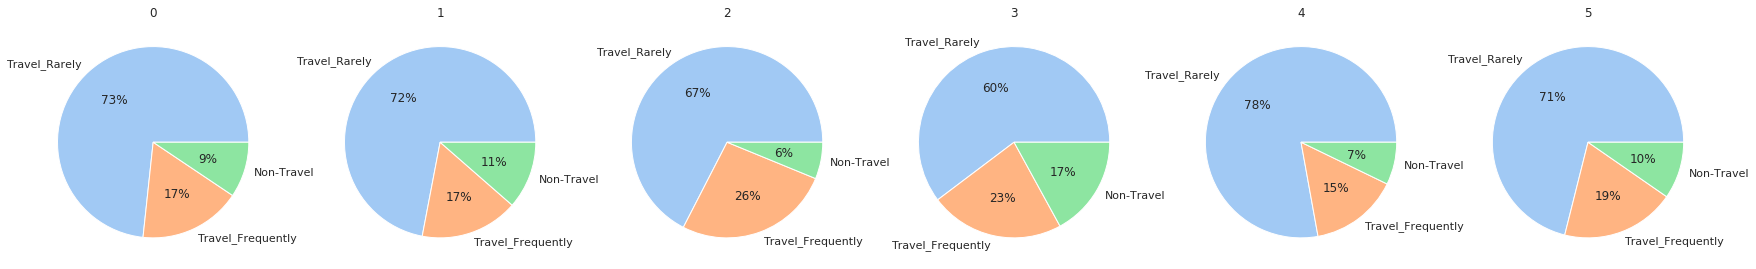

In [35]:
fig, ax = plt.subplots(1, n_clusters_research)

fig.set_figwidth(30)

for i in range(n_clusters_research):
    data = df.loc[df['Job Function']=='Research & Development'].loc[clustering_research_==i]['BusinessTravel']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('' + str(i))

# Human Resources

In [36]:
for i in range(n_clusters_human):
    data = df.loc[df['Job Function']=='Human Resources'].loc[(clustering_human_ ==i)]['Resign Status']
    human_cluster = data.value_counts()
    count = len(data)
    try:
        print(f'Percentage of resigned people in cluster {i} ({count} samples): {human_cluster.Yes} / {count} = {human_cluster.Yes / count:0.2f}')
    except AttributeError:
        print(f'Percentage of resigned people in cluster {i} ({count} samples): 0')

Percentage of resigned people in cluster 0 (20 samples): 6 / 20 = 0.30
Percentage of resigned people in cluster 1 (12 samples): 2 / 12 = 0.17
Percentage of resigned people in cluster 2 (23 samples): 3 / 23 = 0.13
Percentage of resigned people in cluster 3 (8 samples): 1 / 8 = 0.12


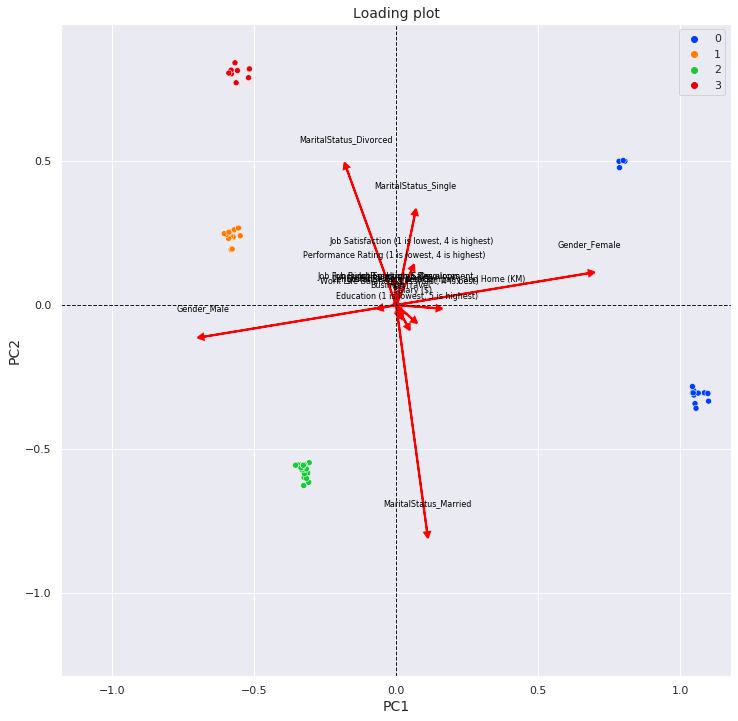

In [37]:
color = sns.color_palette('bright')[:n_clusters_human]

loadingplot(df_encoded.columns, pca_human, 0, 1, width=12, height=12)
sns.scatterplot(x=df_centred_score_human['PC1'], y=df_centred_score_human['PC2'], hue=clustering_human_, palette=color)
plt.show()

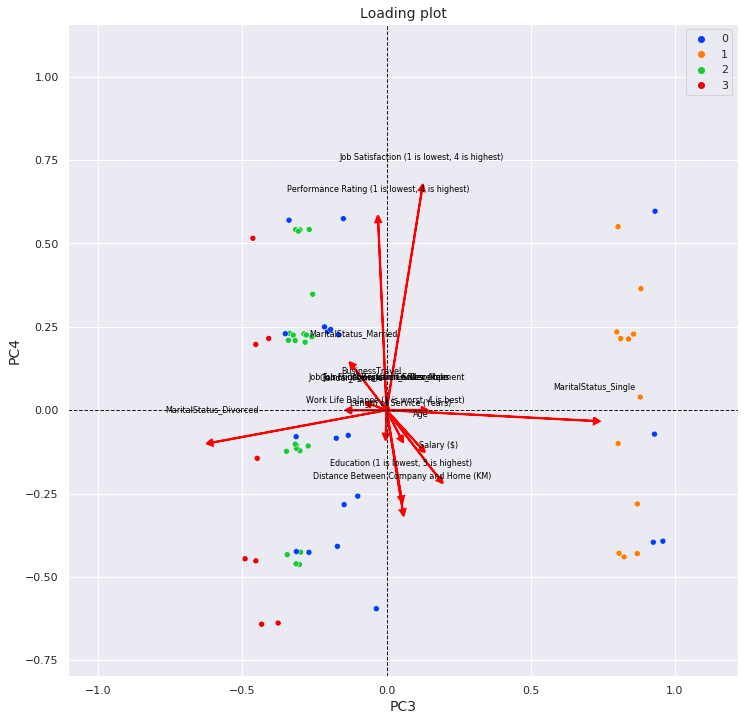

In [38]:
loadingplot(df_encoded.columns, pca_human, 2, 3, width=12, height=12)
sns.scatterplot(x=df_centred_score_human['PC3'], y=df_centred_score_human['PC4'], hue=clustering_human_, palette=color)
plt.show()

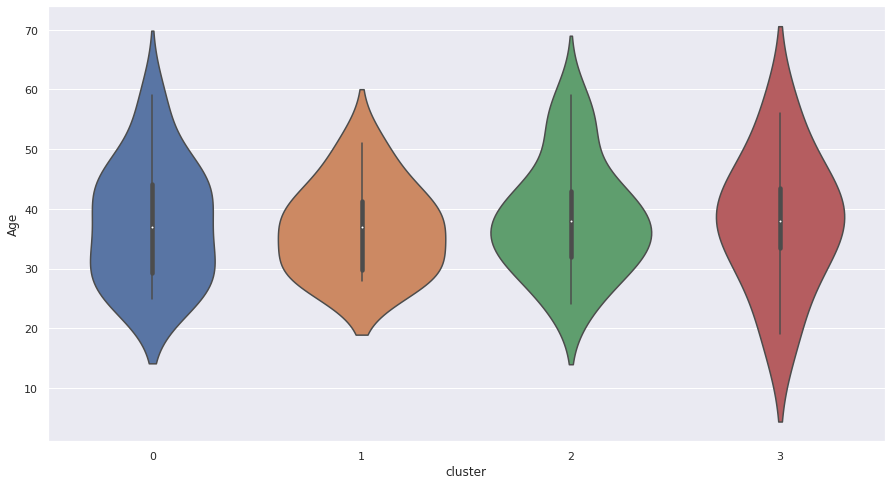

In [39]:
sns.violinplot(y=df_unencoded_human['Age'], x=df_unencoded_human['cluster'])
plt.show()

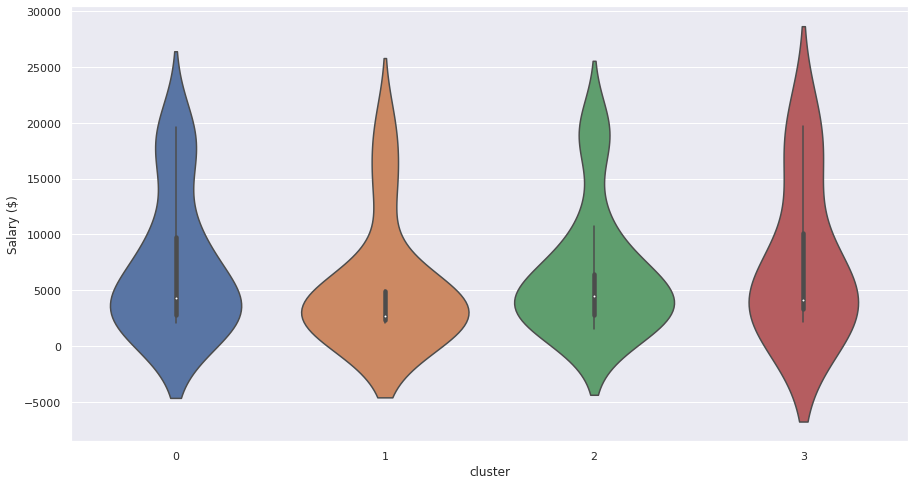

In [40]:
sns.violinplot(y=df_unencoded_human['Salary ($)'], x=df_unencoded_human['cluster'])
plt.show()

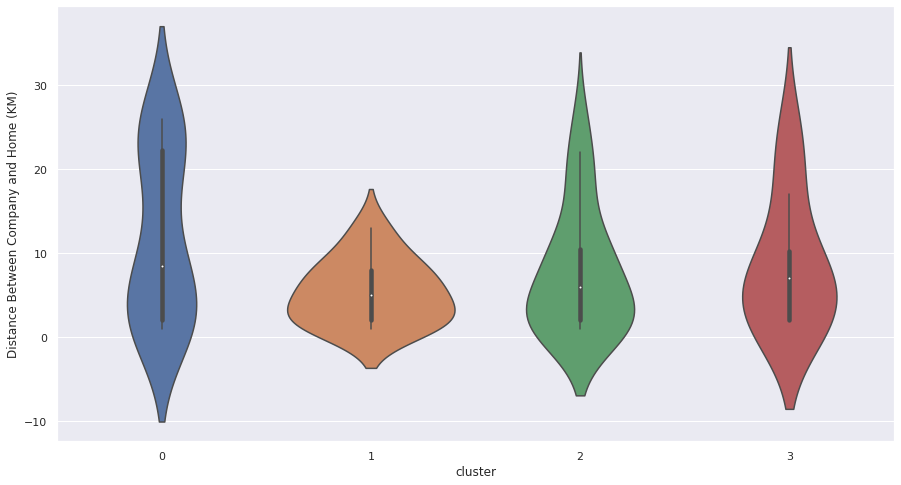

In [41]:
sns.violinplot(y=df_unencoded_human['Distance Between Company and Home (KM)'], x=df_unencoded_human['cluster'])
plt.show()

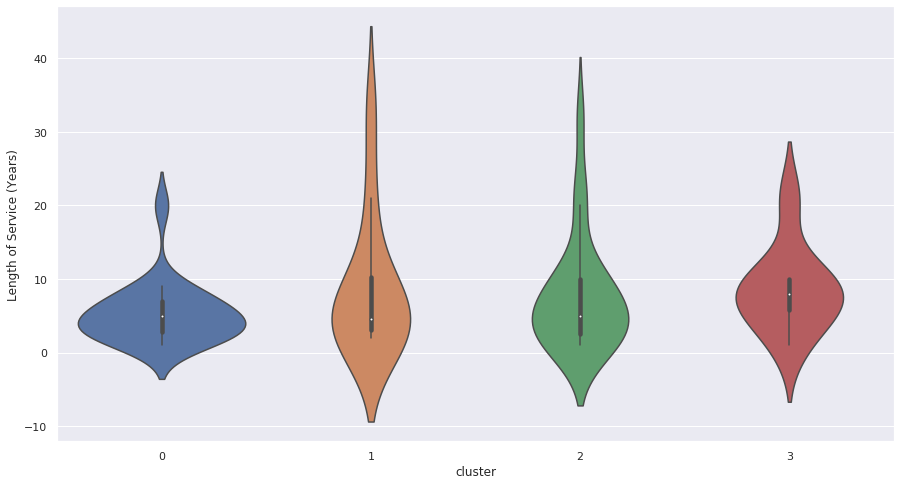

In [42]:
sns.violinplot(y=df_unencoded_human['Length of Service (Years)'], x=df_unencoded_human['cluster'])
plt.show()

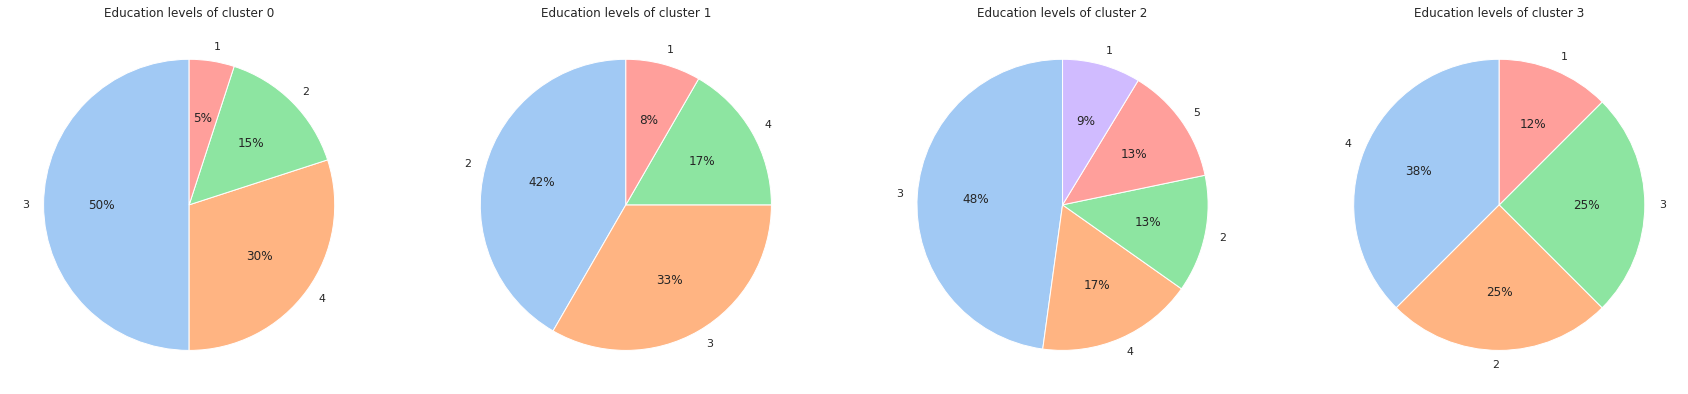

In [43]:
fig, ax = plt.subplots(1, n_clusters_human)

fig.set_figwidth(30)

for i in range(n_clusters_human):
    data = df.loc[df['Job Function']=='Human Resources'].loc[clustering_human_==i]['Education (1 is lowest, 5 is highest)']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%', startangle=90)
    ax[i].set_title('Education levels of cluster ' + str(i))

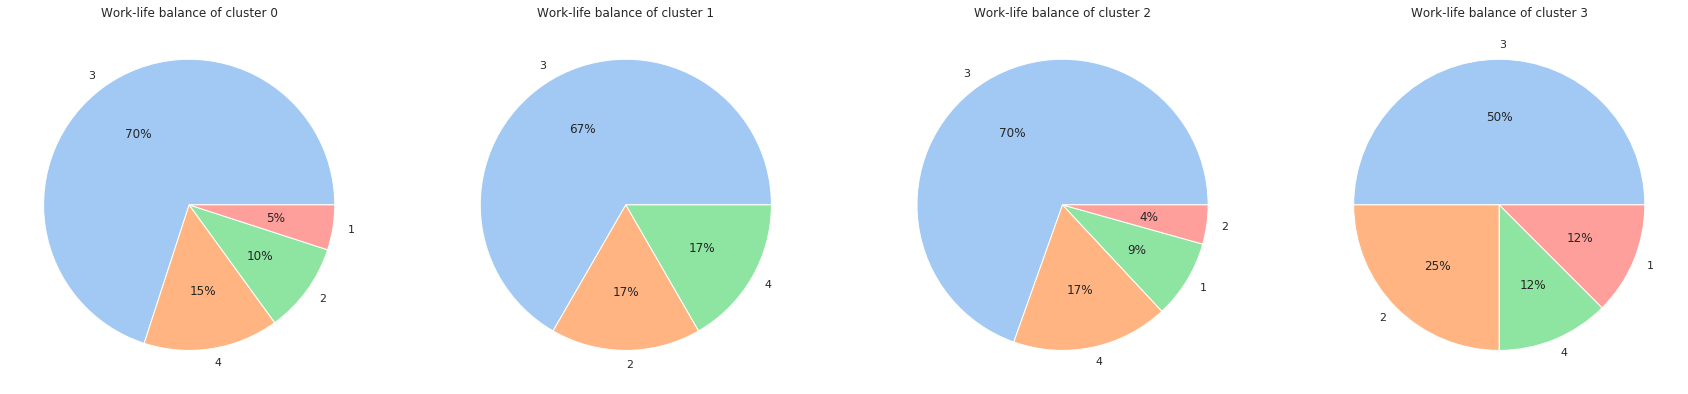

In [44]:
fig, ax = plt.subplots(1, n_clusters_human)

fig.set_figwidth(30)

for i in range(n_clusters_human):
    data = df.loc[df['Job Function']=='Human Resources'].loc[clustering_human_==i]['Work Life Balance (1 is worst, 4 is best)']

    pie_colors = sns.color_palette('pastel')[:4]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('Work-life balance of cluster ' + str(i))

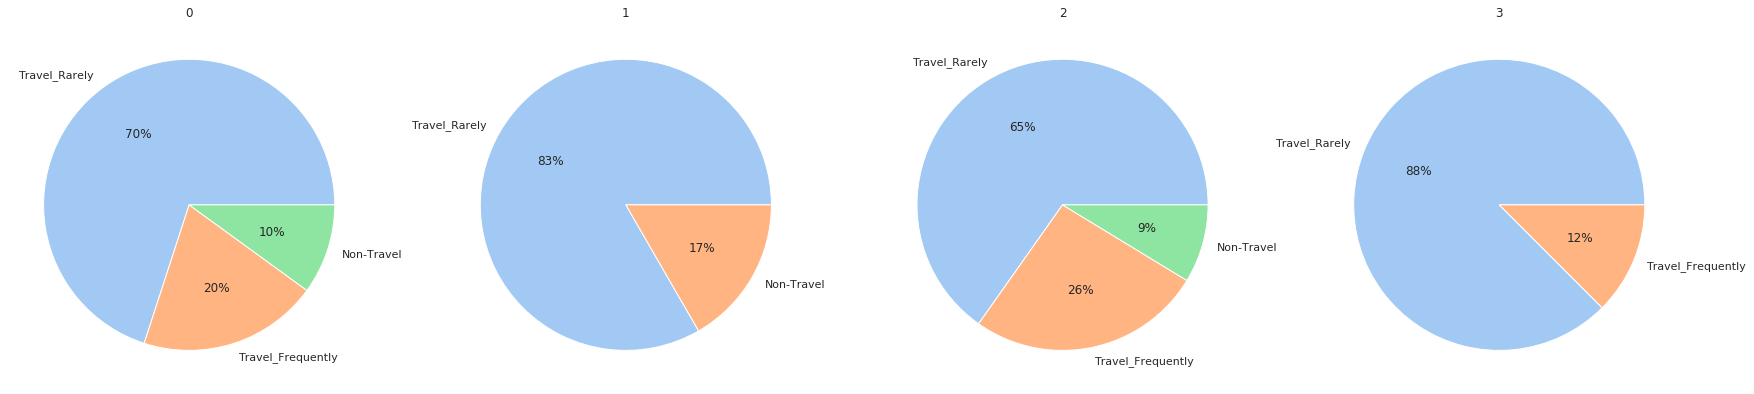

In [45]:
fig, ax = plt.subplots(1, n_clusters_human)Former Software Engineering Intern at Veritas Technologies (company) (2020–2020)2y
Related
What is the missing number in this sequence 3, 7, 10, _,12?

for i in range(n_clusters_human):
    data = df.loc[df['Job Function']=='Human Resources'].loc[clustering_human_==i]['BusinessTravel']

    pie_colors = sns.color_palette('pastel')[:5]
    ax[i].pie(data.value_counts(), labels=data.value_counts().index, colors=pie_colors, autopct='%.0f%%')
    ax[i].set_title('' + str(i))

In [8]:
(64.995 + 83.49 + 84 + 84) / (21 + 23 + 21 + 21)

3.680058139534884